In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.0+cu121'

In [2]:
what_were_covering = {1: "data preparation and loading",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

### 1. Data Preparation and Loading 

Data can be anything.... 
It could be images,videos,excel spreadsheets,audio,DNA,Text. 

Machine learning is game of two parts: 
1. Get the data into numerical representation.
2. Build a model to learn pattern in numerical representation.

We'll use a linear regression formula to make a straight line with known **paramaters**.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze adds extra dimension
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

Training set - Course material 
Validation set - Practise set 
Test set - Final exam 

Generalization - The ability of Ml model to perform well on data it hasn't seen before. 

Validation set is often but not always used. 

Training set ~ 60 -80 % 
Validation set ~ 10 - 20 % 
Testing set ~ 10 - 20 %

In [5]:
# create a train/test spllit 
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_train), len(X_test)

(40, 40, 40, 10)

In [6]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [7]:
# Build a function to visualize the data 
def plot_prediction(train_data = X_train,
                    train_labels = y_train, 
                    test_data = X_test,
                    test_labels = y_test,
                    prediction=None):
    plt.figure(figsize = (5,5))

    # plot training the data in blue 
    plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training Data")

    # plot the testing data in green
    plt.scatter(test_data, test_labels, c = "g", s= 4, label ="Testing Data")

    # Are there prediction? 
    if prediction is not None:
               # plot the prediction if they exit 
               plt.scatter(test_data, prediction, c ="r", s= 4, label="Prediction")
    
    # show the legend
    plt.legend(prop = {"size": 14});

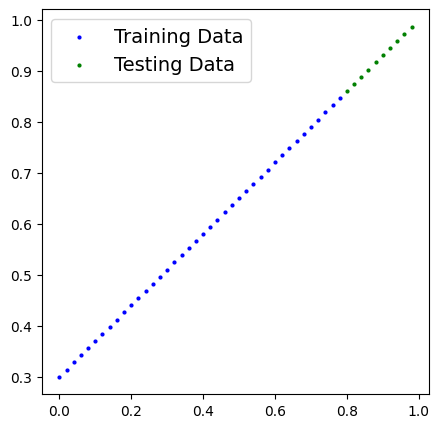

In [8]:
plot_prediction()

### Build model 
What our model does:
* Start with random value (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal value (the weight & bias values we used to create the data)

How does it do so? 
Through two main algorithms: 
* Gradient descent
* Backpropagation

In [9]:
# Create linear regression model class 
class LinearRegressionModel(nn.Module):# <- almost everything in pytorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                               requires_grad = True,
                                               dtype = torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    # Forward method to define the computation in the model 
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        """
        x: torch.Tensor: This indicates that the input x is expected to be a PyTorch tensor.
        -> torch.Tensor: This specifies that the output of the forward method is also a PyTorch tensor.
        """
        return self.weight * x + self.bias # this is linear regression formula 

#### PyTorch model building essentials 

* torch.nn - contains all of the building blocks for computational graphs(a the neural networks).
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module - the base class for all neural network module, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent. # optimizers e.g. gradient descent, ADAM, etc.
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method define what happen in forward computation.
* torch.utils.data.Dataset - Represent a map between key(label) and sample(feature) pairs of your data. Such a images and their associated labels.
* torch.utils.data.DataLoader - Creates a python iterable over a torch Dataset (allows you to iterate over your data).
* torch.nn.functional - layers, activations and more
  > Read more - www.pytorch.org/tutorials/beginner/ptcheat.html

In [10]:
# checking the content of our pytorch model 
# create a random seed 
torch.manual_seed(42)

# create an instance of the model( this is a subclass of the nn.Module) 
model = LinearRegressionModel()

In [11]:
model

LinearRegressionModel()

In [12]:
model.parameters()

<generator object Module.parameters at 0x7fa44cbf0c80>

In [13]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
# list named parameters 
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
weight, bias

(0.7, 0.3)

The better we get ([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))]) value closer to (0.7, 0.3) the better we are able to predict and model. 

In [16]:
# making prediction using `torch.inference_mode()`
# To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.

with torch.inference_mode():
    y_preds = model(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [17]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

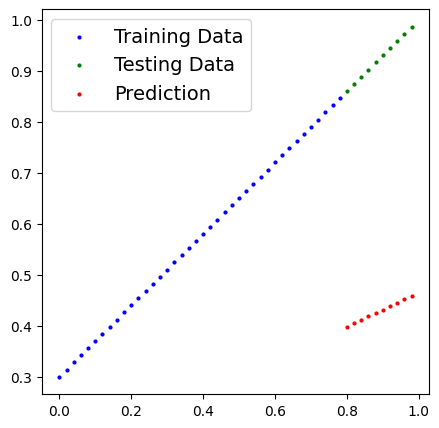

In [18]:
plot_prediction(prediction = y_preds)

#### Train model 
The whole idea of training is for a model from some *unknown* parameters (these may be random) to some *known* parameters. 
Or in other words from a poor representation of the data to a better representation of the data. 

One way to measure how poor or how wrong your models prediction are is to use loss function. 

* NOTE: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:
* **Loss function**: A function to measure how wrong your model's predictiosns are to the ideal outputs, lower is better.
* **Optimizer**: Take into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.

And specifically in pytorch, we need: 
* A training loop
* A testing loop 

In [21]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [29]:
# Check out the model's parameter (a parameter is a value that the model sets itself) 
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [32]:
# Setup a loss function 
loss_fn = nn.L1Loss()

# Setup an optimizer 
optimizer = torch.optim.SGD(params = model.parameters(), 
                           lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set 

#### Building a training loop (and a testing loop) in pytorch
A couple of things we need in a training loop : 
* Loop through the data
* Forward pass ( this involves data moving through our model's `forward()` function) to make prediction on data - also called forward propagation.
* Calculate the loss (compare forward pass predictions to ground truth labels)
* Optimizer zero grad
* Loss Backward - move backward through the network to calculate the gradient of each of the parameters of our model with respect to the loss ( **backpropagation**)
* Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)